In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [5]:
type(x_train)

numpy.ndarray

In [6]:
len(x_train)

60000

In [7]:
x_train[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 197,
        255,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
x_train[200].shape

(28, 28)

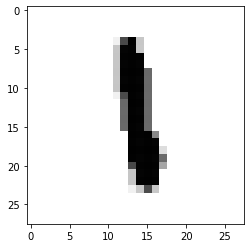

In [9]:
plt.imshow(x_train[200] , cmap = "Greys")

In [10]:
y_train[200]

1

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [13]:
x_train.shape

(60000, 784)

In [14]:
from keras.utils import np_utils

In [15]:
y_train = np_utils.to_categorical(y_train , 10)
y_test = np_utils.to_categorical(y_test , 10)

In [16]:
y_train[200]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.optimizers import sgd

In [18]:
model = Sequential()

In [19]:
model.add(Dense(500 , input_dim =784))
model.add(Activation("sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.add(Dense(500))
model.add(Activation("sigmoid"))

In [21]:
model.add(Dense(10))
model.add(Activation("softmax"))

In [22]:
model.compile(loss = "mse" , optimizer= sgd(lr = 0.1) , metrics=["accuracy"])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train , y_train , batch_size = 100 , epochs = 20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0816 - acc: 0.3571
Epoch 2/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0618 - acc: 0.6346
Epoch 3/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0443 - acc: 0.7808
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0322 - acc: 0.8475
Epoch 5/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0250 - acc: 0.8751
Epoch 6/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0210 - acc: 0.8886
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0185 - acc: 0.8980
Epoch 8/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0168 - acc: 0.9047
Epoch 9/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0155 - acc: 0.9108
Epoch 10/20
60000/60000 [==================

In [25]:
predicts =  model.predict_classes(x_test)

In [26]:
from ipywidgets import interact_manual

In [27]:
def FULL_CONNECT_NEURAL_NETWORK (num):
    plt.imshow(x_test[num].reshape(28,28) , cmap = "Greys")
    print("神經網路預測結果為 :" , predicts[num] )

In [28]:
interact_manual(FULL_CONNECT_NEURAL_NETWORK , num = (0 , 9999))

interactive(children=(IntSlider(value=4999, description='num', max=9999), Button(description='Run Interact', s…

<function __main__.FULL_CONNECT_NEURAL_NETWORK(num)>

In [29]:
model_json = model.to_json()
open("handwriting_model.json" , "w" ).write(model_json)
model.save_weights("handwriting_model_weights.h5")